In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from math import sqrt
import math

### 4.1 (a) Prediction with Gaussian processes can become computationally very expensive when we have lots of observations. Why?

Becuase the equation of Gaussian process prediction is: (B is the observations)
$$\mu_{A|B}=\mu_A+\frac{\sigma_{AB}}{\sigma^2_B}(y_B-\mu_B)$$
$$\sigma^2_{A|B}=\sigma^2_A-\sigma_{AB} \sigma_B^{-2} \sigma_{AB}$$ 
So if we have lots of observations(B), the computation of inversing $\sigma^2_B$( got the $\sigma_B^{-2}$ ) is become so expensive and need lots of computation resource.

## Problem 4.2 Flows and correlation.

The Philippine Archipelago is a fascinating multiscale ocean region. Its geometry is very complex, with multiple straits, islands, steep shelf-breaks, and coastal features, leading to partially intercon- nected seas and basins. In this part, we will be studying, understanding and navigating through the ocean current flows.

### (a) Describe the average flow (averaged over all times, and not location). Are there any constant flow currents that run in the archipelago?

In [3]:
v_40 = np.loadtxt("OceanFlow/40v.csv", delimiter=',')
u_40 = np.loadtxt("OceanFlow/40u.csv", delimiter=',')
mask = np.loadtxt("OceanFlow/mask.csv", delimiter=',')

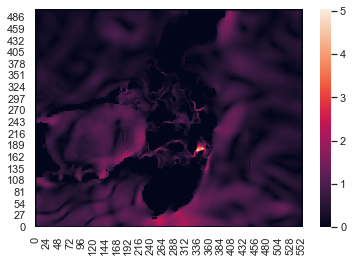

In [4]:
speed_40 = np.sqrt( v_40**2 + u_40**2 )
ax = sns.heatmap(speed_40)
ax.invert_yaxis()
plt.show()

In [23]:
# num_row,num_col = v_40.shape
# X,Y = np.meshgrid( np.arange(0,num_row), np.arange(0,num_col) )
# plt.figure(figsize=(100,100))
# plt.quiver(X,Y,v_40,u_40,scale=100,headwidth=0.005)
# # ax1.invert_yaxis()
# plt.show()

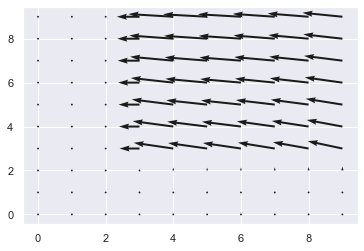

In [5]:
num_row,num_col = v_40.shape
X,Y = np.meshgrid( np.arange(0,10), np.arange(0,10) )
plt.quiver(X,Y,u_40[0:10,0:10],v_40[0:10,0:10])
# ax1.invert_yaxis()
plt.show()

In [6]:
U = np.zeros((num_row, num_col, 100))
V = np.zeros((num_row, num_col, 100))
SPEED = np.zeros((num_row, num_col, 100))
for i in range(100):
    filename_u = "OceanFlow/" + str(i+1) + "u.csv"
    U[:,:,i] = np.loadtxt(filename_u, delimiter=',')
    filename_v = "OceanFlow/" + str(i+1) + "v.csv"
    V[:,:,i] = np.loadtxt(filename_v, delimiter=',')
    SPEED[:,:,i] = np.sqrt( U[:,:,i]**2 + V[:,:,i]**2 )

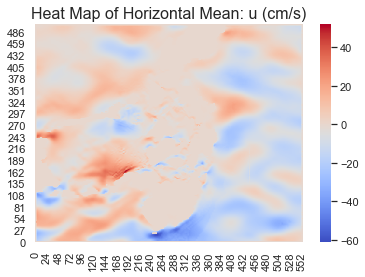

In [7]:
U_mean = np.mean(U, axis=2)*25/0.9
ax_u = sns.heatmap(U_mean, cmap='coolwarm')
ax_u.invert_yaxis()
plt.title("Heat Map of Horizontal Mean: u (cm/s)", size = 16)
plt.savefig("u_mean")
plt.show()

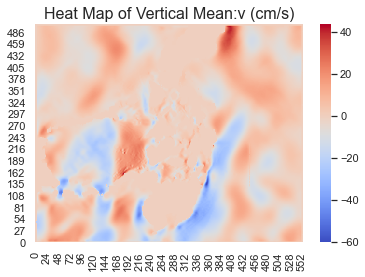

In [9]:
V_mean = np.mean(V, axis=2)*25/0.9
ax_v = sns.heatmap(V_mean, cmap ="coolwarm")
ax_v.invert_yaxis()
plt.title("Heat Map of Vertical Mean:v (cm/s)", size = 16)
plt.savefig("v_mean")
plt.show()

In [10]:
U_var = np.var(U*25/0.9,axis =2)
V_var = np.var(V*25/0.9,axis =2)
log_var = np.log(1+U_var+V_var)

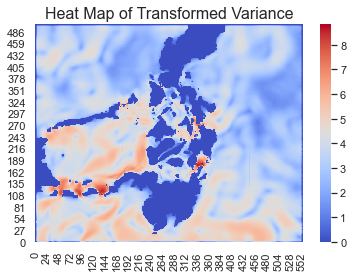

In [11]:
ax_var = sns.heatmap(log_var, cmap = "coolwarm")
ax_var.invert_yaxis()
plt.title("Heat Map of Transformed Variance", size = 16)
plt.savefig('variance')
plt.show()

### (b) Describe the speed of the average flow (again averaged over all times). Compute the needed characteristics to explain your description.

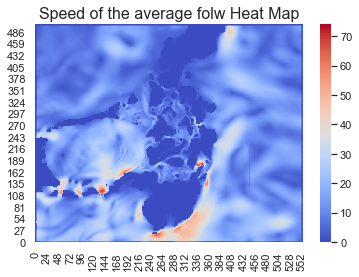

In [22]:
speed_mean_cmps = np.mean(SPEED, axis=2)*25/0.9
ax_speed = sns.heatmap(speed_mean_cmps,cmap="coolwarm")
ax_speed.invert_yaxis()
plt.title('Speed of the average folw Heat Map', size = 16)
plt.savefig('speed')
plt.show()

### (c) Visualize the evolution of the flow and its speed over time. Do you observe any spatial correlation?

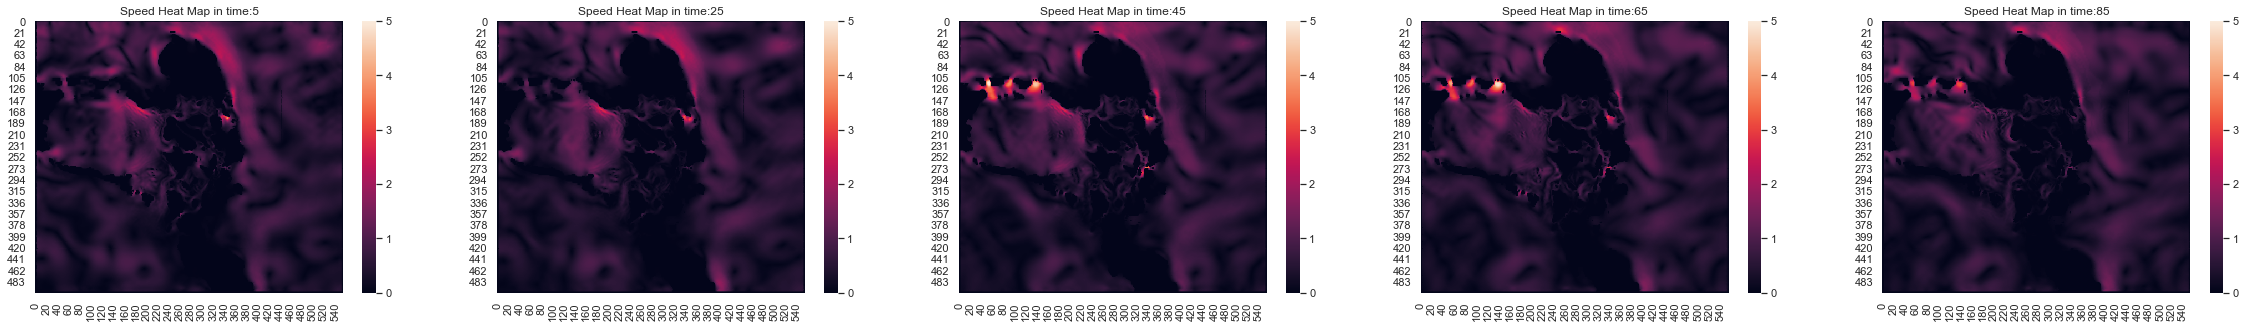

In [41]:
plt.figure(figsize=(40,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    sns.heatmap(SPEED[:,:,i*20+5], vmin=0, vmax=5)
    plt.title("Speed Heat Map in time:"+str(i*20+5))
plt.savefig('correlation')
plt.show()